# Customer Churn Prediction Project

## About the Project
This project focuses on predicting customer churn in a bank, which refers to the likelihood of customers leaving the bank. By accurately predicting customer churn, banks can take proactive measures to retain customers, thus improving customer loyalty and increasing profitability. This project is highly useful in the banking industry as it enables the identification of at-risk customers and helps in formulating strategies to reduce churn rates.

## About Dataset
- **RowNumber**: Corresponds to the record (row) number and has no effect on the output.
- **CustomerId**: Contains random values and has no effect on customer leaving the bank.
- **Surname**: The surname of a customer has no impact on their decision to leave the bank.
- **CreditScore**: Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography**: A customer’s location can affect their decision to leave the bank.
- **Gender**: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age**: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**: Refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**: Active customers are less likely to leave the bank.
- **EstimatedSalary**: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**: Whether or not the customer left the bank.
- **Complain**: Indicates whether the customer has a complaint or not.
- **Satisfaction Score**: Score provided by the customer for their complaint resolution.
- **Card Type**: The type of card held by the customer.
- **Points Earned**: The points earned by the customer for using the credit card.

#### DATASET LINK : https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


## IMPROTING ALL THE REQUIRE DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

## LOADING THE DATASET

In [2]:
df = pd.read_csv('Dataset/Customer-Churn-Records.csv')

## DATA CLEANING AND PROCESSING

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.shape

(10000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
df.duplicated().any()

np.False_

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


REMOVING UNIMPORANTANT FEATURES

In [9]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


In [10]:
df2 = df.drop(['RowNumber','CustomerId', 'Surname', 'Complain','Satisfaction Score','Card Type','Point Earned'], axis=1)

In [11]:
df2.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [12]:
df2.shape

(10000, 11)

## EDA
### UNIVARIATE ANALYSIS

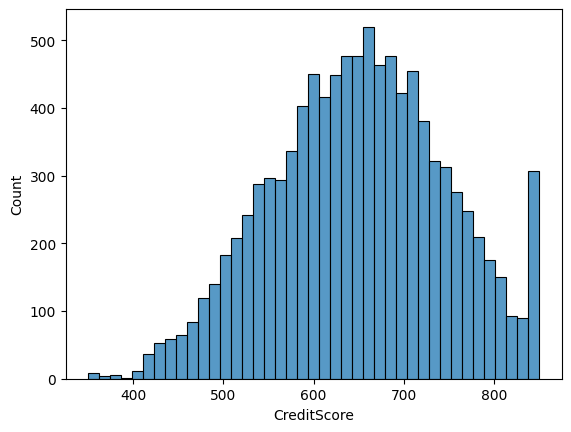

In [13]:
sns.histplot(data=df2, x='CreditScore')
plt.show()

### CreditScore
- The distribution of CreditScore is right-skewed, with most values ranging between 600 to 700.

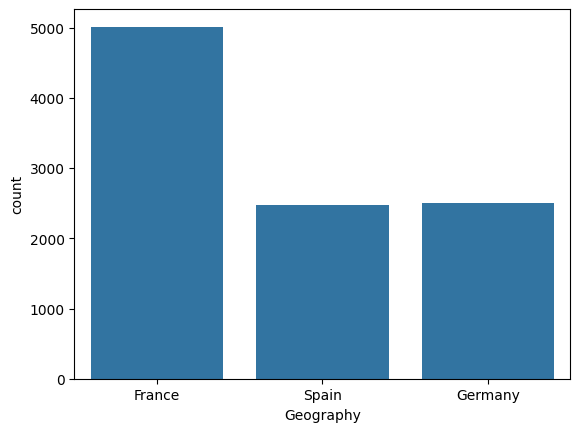

In [14]:
sns.countplot(data=df2, x='Geography')
plt.show()

### Geography
- The dataset includes customers from three unique locations: France, Spain, and Germany. France has the highest count among them, while Spain and Germany are equally represented.


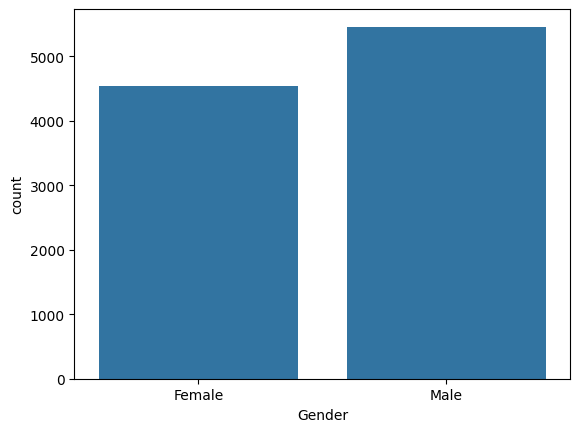

In [15]:
sns.countplot(data=df2, x='Gender')
plt.show()


### Gender
- Gender distribution is nearly equal, with slightly more male customers than female customers.


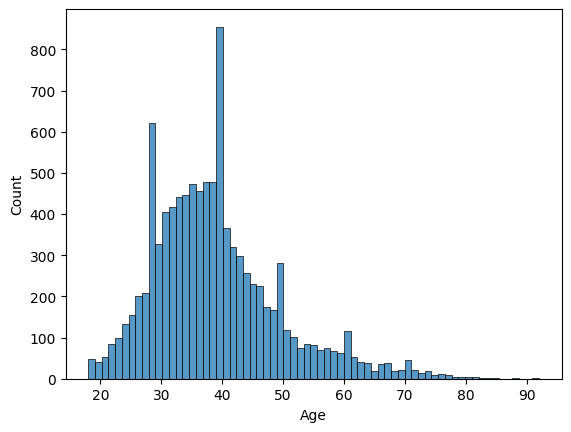

In [16]:
sns.histplot(data=df2, x='Age')
plt.show()

### Age
- Age distribution is left-skewed, with the majority of customers aged between 30 to 40 years.


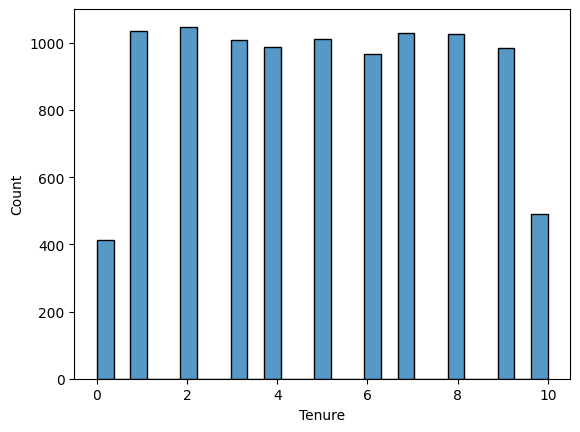

In [17]:
sns.histplot(data=df2, x='Tenure')
plt.show()

### Tenure
- Tenure (years with the bank) shows a uniform distribution across different durations.


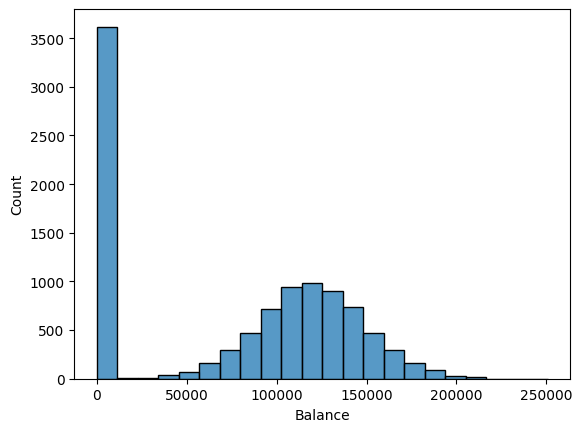

In [18]:
sns.histplot(data=df2, x='Balance')
plt.show()

### Balance
- Over 35% of customers have zero balance, while others range between 100K to 150K, indicating a skewed distribution with a significant number of customers holding low balances.


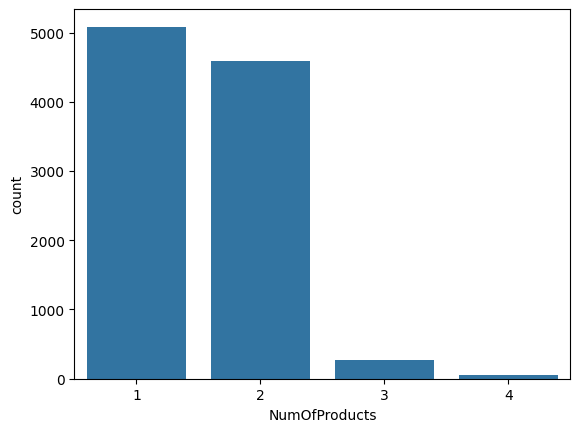

In [19]:
sns.countplot(data=df2, x='NumOfProducts')
plt.show()

### NumOfProducts
- The dataset shows four unique values (1, 2, 3, 4) for the number of products customers have. Most customers have one or two products, suggesting imbalanced data distribution.


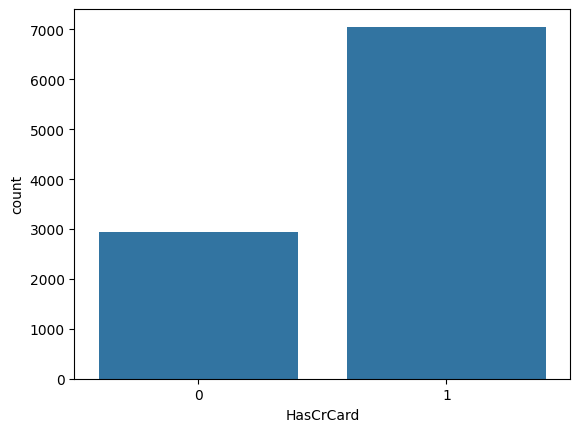

In [20]:
sns.countplot(data=df2, x='HasCrCard')
plt.show()

### HasCrCard
- Approximately 30% of customers do not have a credit card, indicating an imbalance compared to the 70% who do.


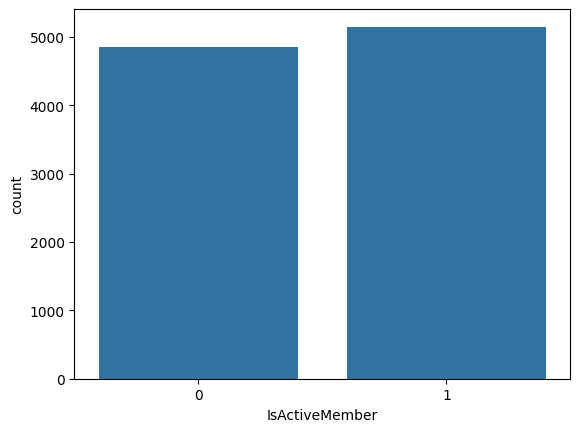

In [21]:
sns.countplot(data=df2, x='IsActiveMember')
plt.show()

### IsActiveMember
- Distribution of active membership status among customers is evenly balanced.


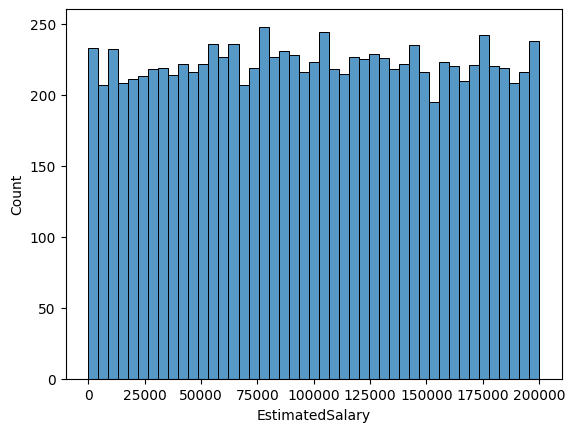

In [22]:
sns.histplot(data=df2, x='EstimatedSalary', bins=45)
plt.show()

### EstimatedSalary
- EstimatedSalary shows a uniform distribution across the dataset.


## BIVARIATE ANALYSIS

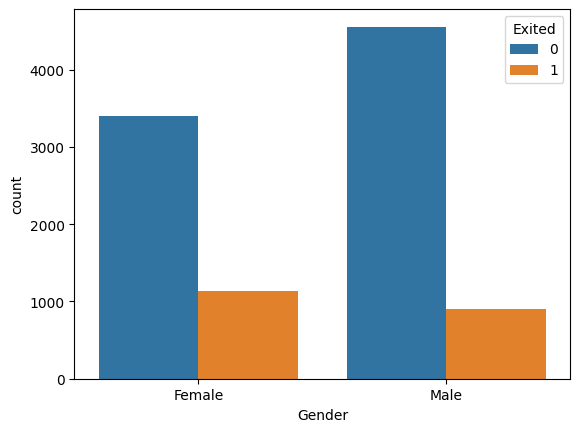

In [23]:
sns.countplot(data=df2, x='Gender', hue='Exited')
plt.show()

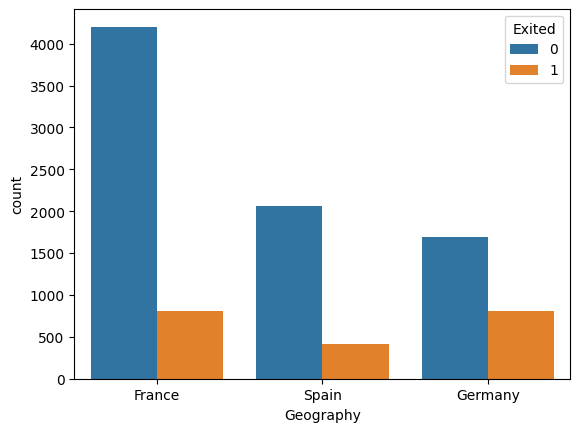

In [24]:
sns.countplot(data=df2, x='Geography', hue='Exited')
plt.show()

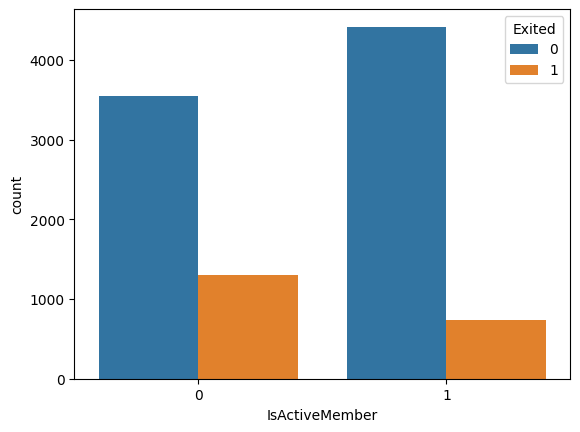

In [25]:
sns.countplot(data=df2, x='IsActiveMember', hue='Exited')
plt.show()

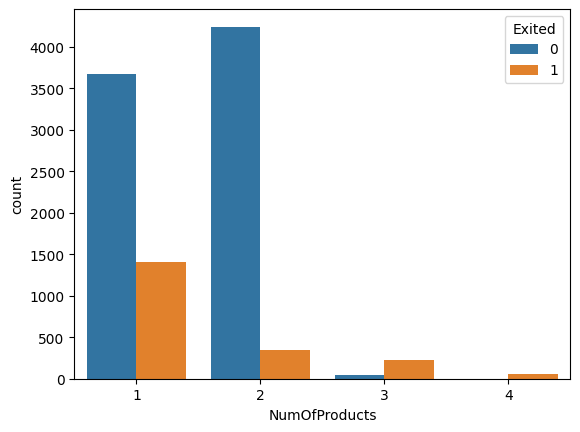

In [26]:
sns.countplot(data=df2, x='NumOfProducts', hue='Exited')
plt.show()

#### MULTIVARIATE ANALYSIS

In [27]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df3 = pd.get_dummies(df2, drop_first=True, dtype=int)

In [29]:
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


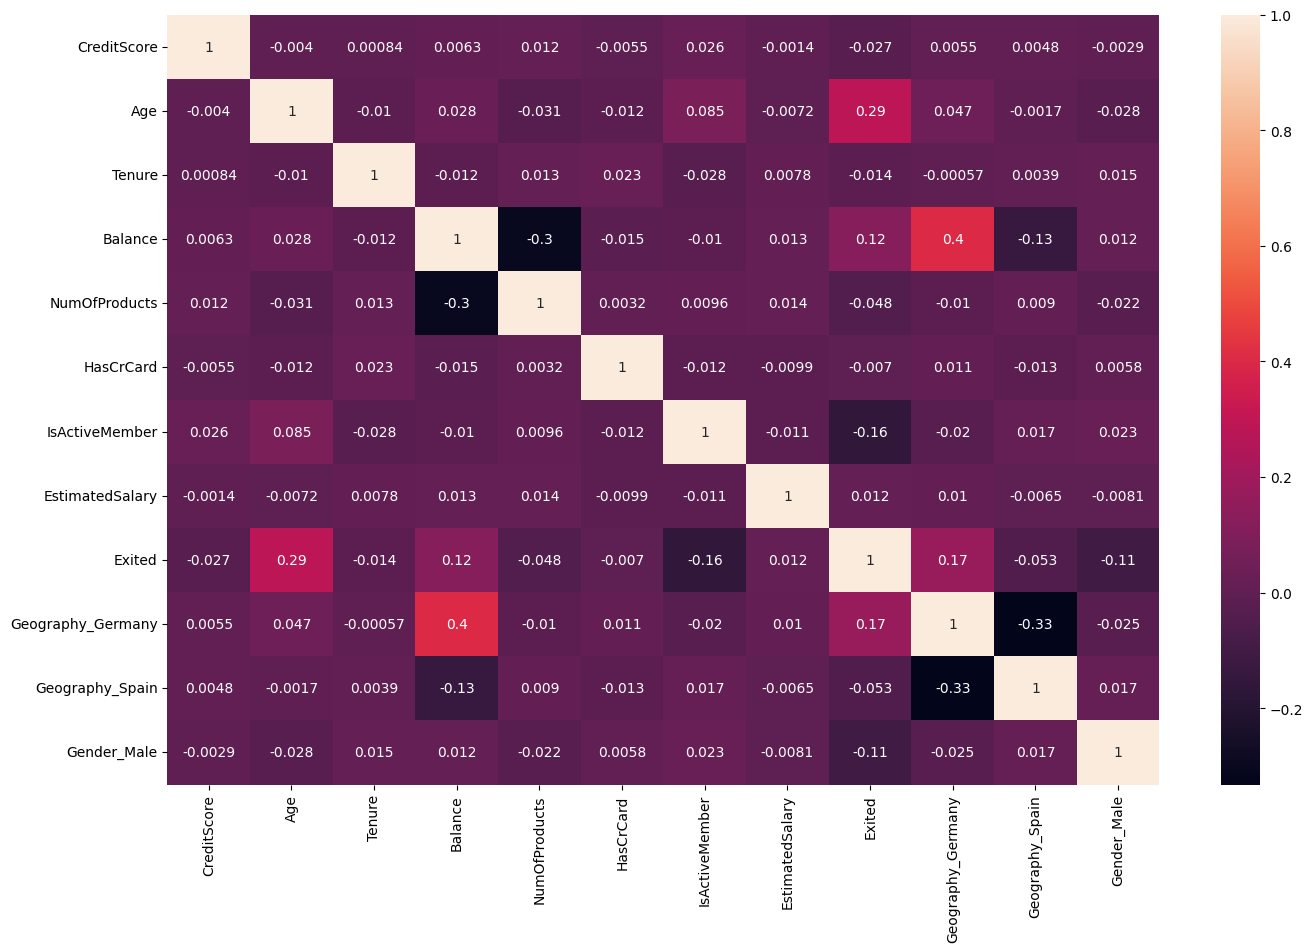

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(df3.corr(), annot=True)
plt.show()

## HANDLING IMBALANCE DATA

<Axes: xlabel='Exited', ylabel='count'>

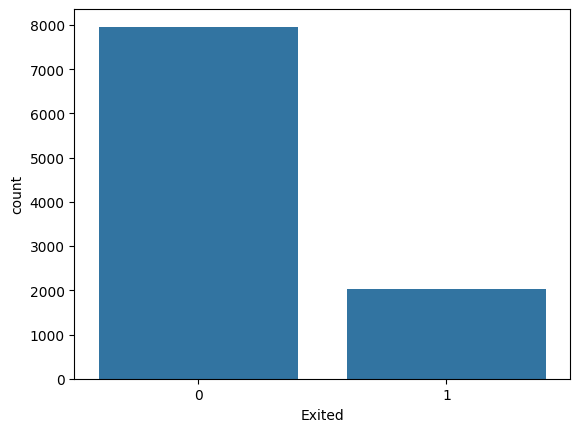

In [31]:
sns.countplot(data=df3, x='Exited')

In [32]:
X = df3.drop('Exited', axis=1)
y = df3['Exited']

In [33]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [34]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [35]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [36]:
y_res.value_counts()

Exited
1    7962
0    7962
Name: count, dtype: int64

In [37]:
sc = StandardScaler()
X_std = sc.fit_transform(X_res)

In [38]:
X_std

array([[-0.32627644,  0.10445632, -1.04506331, ..., -0.57822043,
        -0.45839104, -0.84646511],
       [-0.44585156,  0.00419336, -1.41262201, ..., -0.57822043,
         2.18154349, -0.84646511],
       [-1.59812091,  0.10445632,  1.16028894, ..., -0.57822043,
        -0.45839104, -0.84646511],
       ...,
       [-0.07625573,  0.30498225,  0.42517153, ...,  1.72944426,
        -0.45839104,  1.1813836 ],
       [-0.7176132 ,  0.50550817,  0.79273024, ..., -0.57822043,
        -0.45839104, -0.84646511],
       [-0.34801737,  0.90656001, -0.30994589, ..., -0.57822043,
        -0.45839104, -0.84646511]])

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming X_std and y_res are your standardized features and balanced target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y_res, test_size=0.2, random_state=42)

# Define models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

# Define scoring metrics functions
scoring_functions = {
    'accuracy': accuracy_score,
    'precision_macro': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'recall_macro': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
    'f1_macro': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro')
}

# Store results in a DataFrame
results = []

# Evaluate each model with each scoring metric on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    for metric_name, metric_func in scoring_functions.items():
        y_pred = model.predict(X_test)
        score = metric_func(y_test, y_pred)
        results.append({
            'Model': model_name,
            'Metric': metric_name,
            'Score': score
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
print(results_df)


                 Model           Metric     Score
0         RandomForest         accuracy  0.856515
1         RandomForest  precision_macro  0.856456
2         RandomForest     recall_macro  0.856933
3         RandomForest         f1_macro  0.856457
4   LogisticRegression         accuracy  0.784929
5   LogisticRegression  precision_macro  0.785181
6   LogisticRegression     recall_macro  0.785528
7   LogisticRegression         f1_macro  0.784895
8                  SVM         accuracy  0.837677
9                  SVM  precision_macro  0.837638
10                 SVM     recall_macro  0.838092
11                 SVM         f1_macro  0.837615
12                 KNN         accuracy  0.813501
13                 KNN  precision_macro  0.813875
14                 KNN     recall_macro  0.814219
15                 KNN         f1_macro  0.813481
16    GradientBoosting         accuracy  0.842072
17    GradientBoosting  precision_macro  0.841899
18    GradientBoosting     recall_macro  0.842309


In [43]:
rf = RandomForestClassifier()
rf.fit(X_std, y_res)

RandomForestClassifier()

In [44]:
import pickle

with open('rf_churn.pkl', 'wb') as file:
    pickle.dump(rf, file)
    
with open('rf_churn.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [45]:
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [47]:
df_pre = df3.iloc[[4]]
df_pre = df_pre.drop(df.columns[8], axis=1)
test = sc.fit_transform(df_pre)
prediction = loaded_model.predict(test)
print(prediction)

[1]
